In [1]:
import duckdb
from pathlib import Path

duckdb_path = "data/sakila.duckdb"
Path(duckdb_path).unlink(missing_ok=True)

with duckdb.connect(duckdb_path) as conn, open("sql/load_sakila.sql") as ingest_script:
    conn.sql(ingest_script.read())

    films = conn.sql("FROM film;").df()

films.head()
# from lesson 18

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00


In [2]:
films.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00


In [3]:
# function to query sakila
def query_sakila(query: str, duckdb_path="data/sakila.duckdb"):
    with duckdb.connect(duckdb_path) as conn:
        df = conn.sql(query=query).df()

    return df

## a) Which movies are longer than 3 hours (180 minutes), show the title and its length?

In [4]:
query_sakila("""
    SELECT
    title,
    length
    FROM film
    WHERE length > 180
    ORDER BY length
""").head()

,title,length
0,LAWLESS VISION,181
1,WILD APOLLO,181
2,STAR OPERATION,181
3,RUNAWAY TENENBAUMS,181
4,ANALYZE HOOSIERS,181


b) Which movies have the word "love" in its title? Show the following columns
- title
- rating
- length
- description

In [5]:
query_sakila("""
    SELECT
    title,
    rating,
    length,
    description
    FROM film
    WHERE title ILIKE '%love%'
""")

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
5,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...
6,LOVELY JINGLE,PG,65,A Fanciful Yarn of a Crocodile And a Forensic ...
7,LOVER TRUMAN,G,75,A Emotional Yarn of a Robot And a Boy who must...
8,LOVERBOY ATTACKS,PG-13,162,A Boring Story of a Car And a Butler who must ...
9,STRANGELOVE DESIRE,NC-17,103,A Awe-Inspiring Panorama of a Lumberjack And a...


In [6]:
query_sakila("""
    SELECT
    title,
    rating,
    length,
    description
    FROM film
    WHERE regexp_matches(title, '\\blove\\b', 'i')
""")

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
3,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
4,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...


## c) Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and
## longest movie length


In [7]:

query_sakila("""
    SELECT
    MIN(length) AS shortest,
    AVG(length) AS average,
    MEDIAN(length) as median,
    MAX(length) AS longest
    FROM film
""")

,shortest,average,median,longest
0,46,115.272,114.0,185


## d) The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can
## keep the movie. The Manager wants to know the 10 most expensive movies to rent per day.


In [66]:
query_sakila("""
    SELECT
    title,
    rental_rate,
    rental_duration,
    rental_rate / rental_duration AS cost_per_day
    FROM film
    ORDER BY cost_per_day DESC
""").head(10)

,title,rental_rate,rental_duration,cost_per_day
0,PATHS CONTROL,4.99,3,1.663333
1,BACKLASH UNDEFEATED,4.99,3,1.663333
2,BEHAVIOR RUNAWAY,4.99,3,1.663333
3,VIRTUAL SPOILERS,4.99,3,1.663333
4,TEEN APOLLO,4.99,3,1.663333
5,TELEGRAPH VOYAGE,4.99,3,1.663333
6,BILKO ANONYMOUS,4.99,3,1.663333
7,HEARTBREAKERS BRIGHT,4.99,3,1.663333
8,CLERKS ANGELS,4.99,3,1.663333
9,TIES HUNGER,4.99,3,1.663333


## e) Which actors have played in most movies? Show the top 10 actors with the number of movies they have
## played in.


In [9]:
query_sakila("""
SELECT
a.first_name || ' ' || a.last_name AS actor_name,
COUNT(f.film_id) AS film_count
FROM actor a
JOIN film_actor fa ON fa.actor_id = a.actor_id
JOIN film f ON f.film_id = fa.film_id
GROUP BY actor_name
ORDER BY film_count DESC LIMIT 10
""")



,actor_name,film_count
0,SUSAN DAVIS,54
1,GINA DEGENERES,42
2,WALTER TORN,41
3,MARY KEITEL,40
4,MATTHEW CARREY,39
5,SANDRA KILMER,37
6,SCARLETT DAMON,36
7,GROUCHO DUNST,35
8,HENRY BERRY,35
9,VAL BOLGER,35


## f) Now it's time for you to choose your own question to explore the sakila database! Write down 3-5
## questions you want to answer and then answer them using pandas and duckdb.


Question 1.

Question 2.

Question 3.

## Task 2 - graphs

## a) Who are our top 5 customers by total spend? The Manager wants to know so that they can reward them
## with special offers. Create a bar chart showing the top 5 customers by total spend.

In [21]:
customers_spend = query_sakila("""
SELECT
c.first_name || ' ' || c.last_name AS customer_name,
SUM(p.amount) AS total_spend
FROM customer c
JOIN payment p ON p.customer_id = c.customer_id
GROUP BY customer_name
ORDER BY total_spend DESC
""")

customers_spend.head()

,customer_name,total_spend
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,RHONDA KENNEDY,194.61
4,MARION SNYDER,194.61


<Axes: title={'center': 'Top 5 customers'}, xlabel='amount spent', ylabel='customer'>

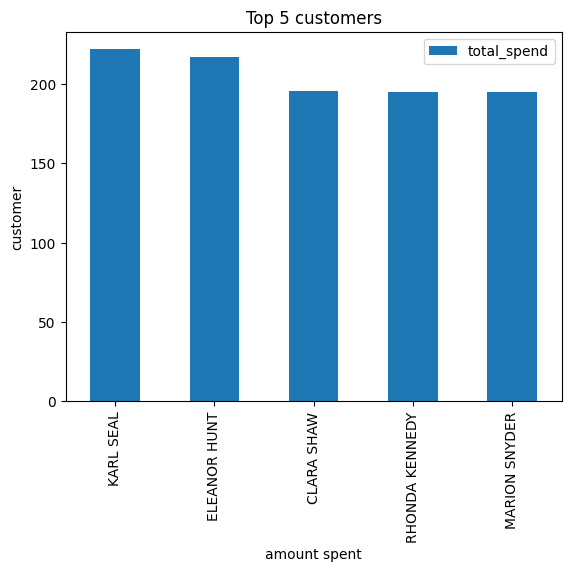

In [65]:
ax = customers_spend.head().plot(
    kind="bar",
    x="customer_name",
    y="total_spend",
    title="Top 5 customers",
    xlabel="amount spent",
    ylabel="customer",
)

ax

## b) How much money does each film category bring in? Make a bar chart showing total revenue per film
## category

Hint: join category -> film_category -> film -> inventory -> rental ->
payment

In [56]:
film_category_earnings = query_sakila("""
SELECT
c.name AS category,
SUM(p.amount) AS earnings
FROM category c
JOIN film_category fc ON fc.category_id = c.category_id
JOIN film f ON f.film_id = fc.film_id
JOIN inventory i ON i.film_id = f.film_id
JOIN rental r ON r.inventory_id = i.inventory_id
JOIN payment p ON p.rental_id = r.rental_id
GROUP BY category
ORDER BY earnings DESC
""")

film_category_earnings.head()

,category,earnings
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58


<Axes: title={'center': 'Revenue per film category'}, ylabel='category'>

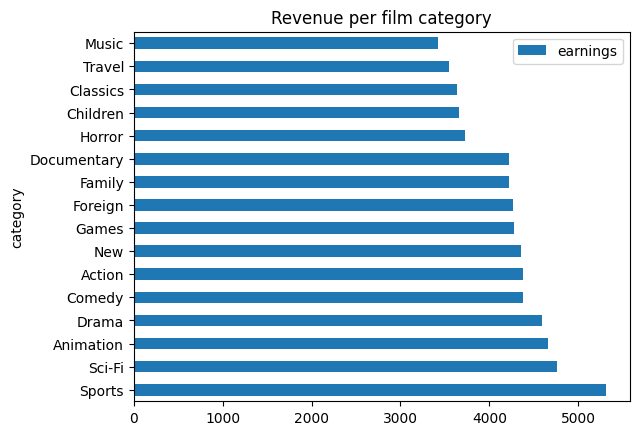

In [57]:
ax = film_category_earnings.plot(
    kind="barh",
    x="category",
    y="earnings",
    title="Revenue per film category",
)

ax